## Time Series Visualizer 

### In the cell below is the final code for the project

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(
    "fcc-forum-pageviews.csv", parse_dates=["Date"])

# Clean data
df = None


def draw_line_plot():
    # Draw line plot





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


ValueError: Missing column provided to 'parse_dates': 'Date'

### First the necessary libraries are imported and the csv file is read, setting the date column as the index.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv(
    "fcc-forum-pageviews.csv", parse_dates=True).set_index('date')



### Next I clean up the data, removing potential outliers, then I plot the line graph

<AxesSubplot: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

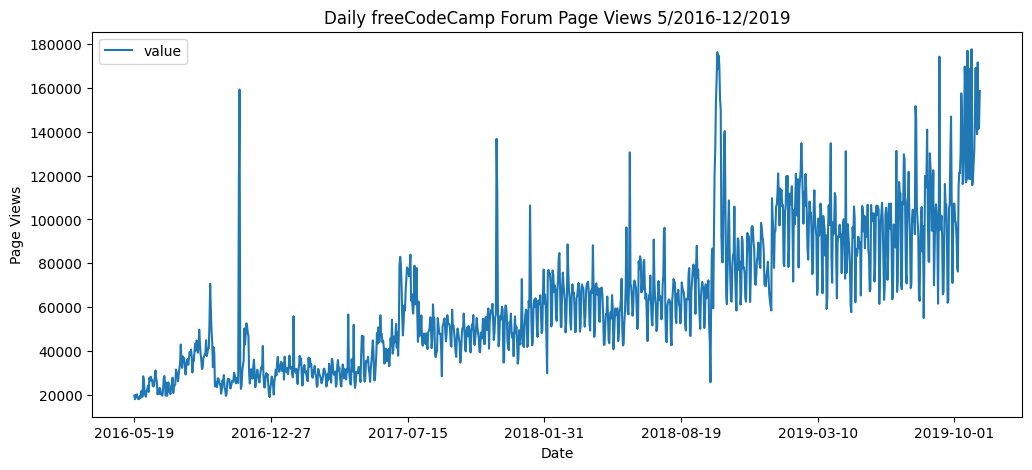

In [2]:

df = df[
    (df['value'] >= (df['value'].quantile(0.025))) &
    (df['value'] <= (df['value'].quantile(0.975)))
    ]

df.plot(kind="line", figsize=(12,5), xlabel= "Date", ylabel="Page Views", title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019") 

### Next I prepare the data for a categorical bar plot. I create the Year and Month columns by getting this info from the Datetime object in the "date" column

In [3]:
df_bar = df.copy()
df_bar = df_bar.reset_index()
df_bar["date"] = pd.to_datetime(df_bar["date"])

df_bar["Years"] = df_bar["date"].dt.year
df_bar["Months"] = df_bar["date"].dt.month_name()

### I use the groupby method to organise the data better for the categorical plot, and rename the "value" column

In [4]:
#we need pd.DataFrame for some reason.... I think we need to create a new df and make sure our df_bar is a dataframe object and not a series object..
# because "rename" doesn't work when I don't use DataFrame.. It throws an exception: Series.rename got unexpected keyword "columns", which shouldn't be the case
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()

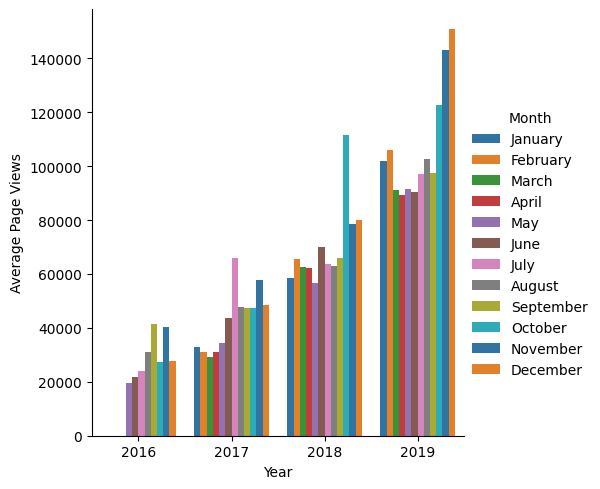

In [12]:

# Draw bar plot
fig = sns.catplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", kind="bar", palette="tab10")



<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3+ KB


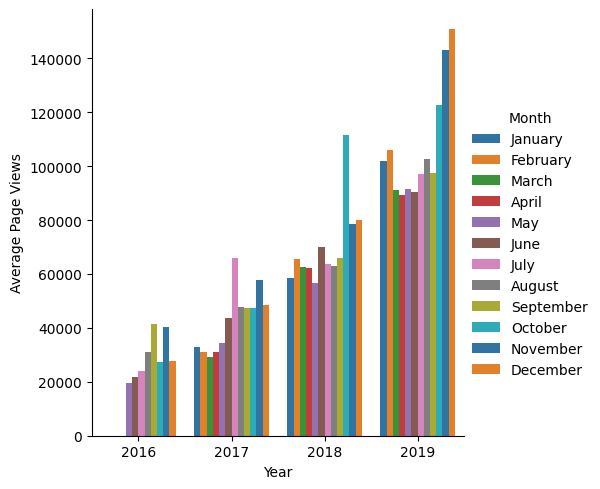

In [11]:
    # ANSWER FROM ONLINE
df_bar = df.copy()
df_bar = df_bar.reset_index()
df_bar["date"] = pd.to_datetime(df_bar["date"])

df_bar["Year"] = df_bar["date"].dt.year
df_bar["Month"] = df_bar["date"].dt.month_name()
#df_bar["Average Page views"] = df_bar.loc[(df_bar["Month"])]
    
#df_bar = df.copy().reset_index()
#df_bar["date"] = pd.to_datetime(df_bar["date"])
#df_bar["Years"] = df_bar["date"].year
#df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Year", "Month"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()
missing_data = {
    "Year": [2016, 2016, 2016, 2016],
    "Month": ['January', 'February', 'March', 'April'],
    "Average Page Views": [0, 0, 0, 0]}

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

# Draw bar plot

#chart = sns.barplot(data=df_bar, x="Year", y="Average Page Views", hue="Month", palette="tab10")
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

TypeError: Series.rename() got an unexpected keyword argument 'columns'

<AxesSubplot: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

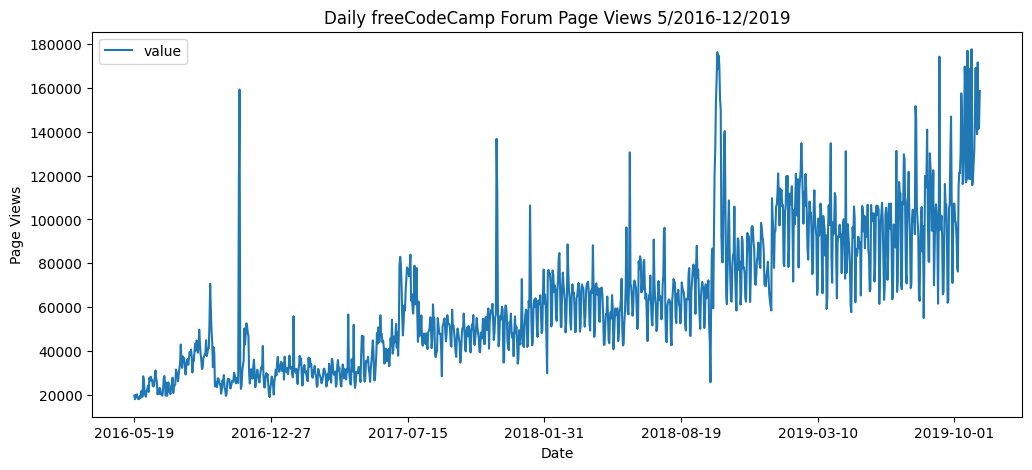

In [22]:
#can query dates like so:
#df.loc[(df['date'] >= '2016-05-09')
#                     & (df['date'] < '2016-05-30')]


#can query the index like so
df.loc[(df.index >= '2016-05-09')
        & (df.index < '2016-05-30')]



,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3+ KB


In [4]:
df_bar = df.copy()
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [3]:
df_bar = df_bar.reset_index()
df_bar["date"] = pd.to_datetime(df_bar["date"])

df_bar["Year"] = df_bar["date"].dt.year
df_bar["Month"] = df_bar["date"].dt.month_name()
#df_bar["Average Page views"] = df_bar.loc[(df_bar["Month"])]


In [6]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1238 non-null   datetime64[ns]
 1   value   1238 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.5 KB


In [6]:
df_bar["Year"] = df_bar["date"].dt.year
df_bar["Month"] = df_bar["date"].dt.month_name()
#df_bar["Average Page views"] = df_bar.loc[(df_bar["Month"])]

                                           
#df.loc[(df.index >= '2016-05-09')
 #       & (df.index < '2016-05-30')]

In [16]:
average_per_month = df_bar.loc[df_bar["Month"] == "May"]["value"]
print(average_per_month)

KeyError: "None of [Index(['May', 'May', 'May', 'May', 'May', 'June', 'June', 'June', 'June',\n       'June',\n       ...\n       'November', 'November', 'November', 'November', 'November', 'November',\n       'November', 'November', 'December', 'December'],\n      dtype='object', length=1238)] are in the [index]"

In [ ]:
#So we have to create these columns: Years, Average Page Views, and Months

fig = sns.catplot(data=df, x="Years", y="Average Page Views", hue="Month", kind="bar")

#properly format Date, Create new dataframe, need months column, years column? and average views in each


In [16]:

df_bar = df_bar.groupby(["Year", "Month"], sort= False)["value"].mean().round().astype(int)


AttributeError: module 'pandas' has no attribute 'groupby'

In [7]:
df_bar.rename(columns={df_bar.columns[-1]: "Average Page Views"}, inplace=True)


In [9]:
df_bar.head()

,date,value,Year,Average Page Views
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


In [22]:
#So we have to create these columns: Years, Average Page Views, and Months

fig = sns.catplot(data=df_bar, x= df_bar.index, y="value", hue="Month", kind="bar")

#xlabel= "Year", ylabel="Average Page Views")

#properly format Date, Create new dataframe, need months column, years column? and average views in each

ValueError: Could not interpret input 'value'